In [1]:
import os
import pandas as pd
import tensorflow as tf

In [2]:

# Define the directory paths
normal_dir = 'chest_xray/train/NORMAL'
pneumonia_dir = 'chest_xray/train/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
train_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(train_df)

                                                   file      label
0             chest_xray/train/NORMAL\IM-0115-0001.jpeg     normal
1             chest_xray/train/NORMAL\IM-0117-0001.jpeg     normal
2             chest_xray/train/NORMAL\IM-0119-0001.jpeg     normal
3             chest_xray/train/NORMAL\IM-0122-0001.jpeg     normal
4             chest_xray/train/NORMAL\IM-0125-0001.jpeg     normal
...                                                 ...        ...
3787  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia
3788  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia
3789  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia
3790  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia
3791  chest_xray/train/PNEUMONIA\person438_bacteria_...  pneumonia

[3792 rows x 2 columns]


In [3]:
# Define the directory paths
normal_dir = 'chest_xray/test/NORMAL'
pneumonia_dir = 'chest_xray/test/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
test_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(test_df)

                                                  file      label
0             chest_xray/test/NORMAL\IM-0001-0001.jpeg     normal
1             chest_xray/test/NORMAL\IM-0003-0001.jpeg     normal
2             chest_xray/test/NORMAL\IM-0005-0001.jpeg     normal
3             chest_xray/test/NORMAL\IM-0006-0001.jpeg     normal
4             chest_xray/test/NORMAL\IM-0007-0001.jpeg     normal
..                                                 ...        ...
619  chest_xray/test/PNEUMONIA\person96_bacteria_46...  pneumonia
620  chest_xray/test/PNEUMONIA\person96_bacteria_46...  pneumonia
621  chest_xray/test/PNEUMONIA\person97_bacteria_46...  pneumonia
622  chest_xray/test/PNEUMONIA\person99_bacteria_47...  pneumonia
623  chest_xray/test/PNEUMONIA\person99_bacteria_47...  pneumonia

[624 rows x 2 columns]


In [4]:
# Define the directory paths
normal_dir = 'chest_xray/val/NORMAL'
pneumonia_dir = 'chest_xray/val/PNEUMONIA'

# Get the list of all files in each directory
normal_files = [os.path.join(normal_dir, file) for file in os.listdir(normal_dir)]
pneumonia_files = [os.path.join(pneumonia_dir, file) for file in os.listdir(pneumonia_dir)]

# Create a DataFrame
val_df = pd.DataFrame({
    'file': normal_files + pneumonia_files,
    'label': ['normal'] * len(normal_files) + ['pneumonia'] * len(pneumonia_files)
})

print(val_df)

                                                 file      label
0     chest_xray/val/NORMAL\NORMAL2-IM-1427-0001.jpeg     normal
1     chest_xray/val/NORMAL\NORMAL2-IM-1430-0001.jpeg     normal
2     chest_xray/val/NORMAL\NORMAL2-IM-1431-0001.jpeg     normal
3     chest_xray/val/NORMAL\NORMAL2-IM-1436-0001.jpeg     normal
4     chest_xray/val/NORMAL\NORMAL2-IM-1437-0001.jpeg     normal
5     chest_xray/val/NORMAL\NORMAL2-IM-1438-0001.jpeg     normal
6     chest_xray/val/NORMAL\NORMAL2-IM-1440-0001.jpeg     normal
7     chest_xray/val/NORMAL\NORMAL2-IM-1442-0001.jpeg     normal
8   chest_xray/val/PNEUMONIA\person1946_bacteria_4...  pneumonia
9   chest_xray/val/PNEUMONIA\person1946_bacteria_4...  pneumonia
10  chest_xray/val/PNEUMONIA\person1947_bacteria_4...  pneumonia
11  chest_xray/val/PNEUMONIA\person1949_bacteria_4...  pneumonia
12  chest_xray/val/PNEUMONIA\person1950_bacteria_4...  pneumonia
13  chest_xray/val/PNEUMONIA\person1951_bacteria_4...  pneumonia
14  chest_xray/val/PNEUMO

Générateur des images

In [6]:
# Initialize the ImageDataGenerator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,  # scale pixel values to [0, 1]
    shear_range=0.2,  # randomly apply shearing transformations
    zoom_range=0.2,  # randomly zooming inside pictures
    horizontal_flip=True  # randomly flip half of the images horizontally
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

test_generator = datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col="file",
    y_col="label",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 3792 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


Création du modèle

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(150, 150, 3)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Entraînement du modèle

In [8]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  # nombre d'images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # nombre d'images = batch_size * steps
      verbose=2)

Epoch 1/15


1/1 - 5s - loss: 0.7741 - accuracy: 0.3438 - val_loss: 15.8343 - val_accuracy: 0.5000 - 5s/epoch - 5s/step
Epoch 2/15
1/1 - 1s - loss: 7.8227 - accuracy: 0.7500 - 1s/epoch - 1s/step
Epoch 3/15
1/1 - 1s - loss: 8.5494 - accuracy: 0.7500 - 982ms/epoch - 982ms/step
Epoch 4/15
1/1 - 1s - loss: 5.5359 - accuracy: 0.7188 - 1s/epoch - 1s/step
Epoch 5/15
1/1 - 1s - loss: 0.6801 - accuracy: 0.7188 - 1s/epoch - 1s/step
Epoch 6/15
1/1 - 1s - loss: 10.8886 - accuracy: 0.4062 - 1s/epoch - 1s/step
Epoch 7/15
1/1 - 2s - loss: 9.8726 - accuracy: 0.4688 - 2s/epoch - 2s/step
Epoch 8/15
1/1 - 1s - loss: 6.3448 - accuracy: 0.2812 - 1s/epoch - 1s/step
Epoch 9/15
1/1 - 1s - loss: 2.1116 - accuracy: 0.6562 - 1s/epoch - 1s/step
Epoch 10/15
1/1 - 1s - loss: 6.1055 - accuracy: 0.6250 - 1s/epoch - 1s/step
Epoch 11/15
1/1 - 1s - loss: 7.9111 - accuracy: 0.5938 - 1s/epoch - 1s/step
Epoch 12/15
1/1 - 1s - loss: 5.2564 - accuracy: 0.7188 - 1s/epoch - 1s/step
Epoch 13/15
1/1 - 1s - loss: 4.3504 - accurac

In [9]:
model.evaluate(test_generator)

20/20 [==============================] - 20s 1s/step - loss: 3.8048 - accuracy: 0.3750


[3.804805278778076, 0.375]

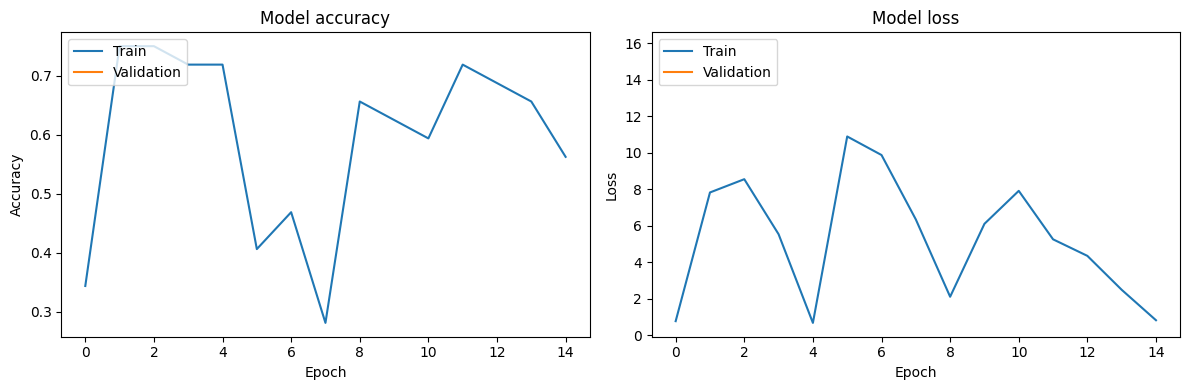

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume y_true are your true labels and y_pred are the predicted labels
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

NameError: name 'y_true' is not defined